In [1]:
import pandas as pd
data = pd.read_csv('Airline_Dataset.csv')

In [2]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
data['Total Delay in Minutes'] = data['Departure Delay in Minutes'] + data['Arrival Delay in Minutes']
data.drop(columns=['Departure Delay in Minutes', 'Arrival Delay in Minutes'], inplace=True)
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Satisfaction,Total Delay in Minutes
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,4,3,4,4,5,5,neutral or dissatisfied,43.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,1,5,3,1,4,1,neutral or dissatisfied,7.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,5,4,3,4,4,4,5,satisfied,0.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,2,5,3,1,4,2,neutral or dissatisfied,20.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,5,3,3,4,4,3,3,3,satisfied,0.0


In [5]:
data.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Satisfaction                           0
Total Delay in Minutes               393
dtype: int64

In [22]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data, target = 'Satisfaction', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Satisfaction
2,Target type,Binary
3,Target mapping,"neutral or dissatisfied: 0, satisfied: 1"
4,Original data shape,"(129880, 23)"
5,Transformed data shape,"(129880, 25)"
6,Transformed train set shape,"(90916, 25)"
7,Transformed test set shape,"(38964, 25)"
8,Ordinal features,3
9,Numeric features,18


In [23]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9661,0.9956,0.9479,0.9733,0.9604,0.9308,0.9310,158.8060
lightgbm,Light Gradient Boosting Machine,0.9653,0.9953,0.9451,0.9742,0.9594,0.9291,0.9294,7.5200
xgboost,Extreme Gradient Boosting,0.9646,0.9952,0.9457,0.9721,0.9587,0.9278,0.9281,66.9610
rf,Random Forest Classifier,0.9634,0.9939,0.9413,0.9736,0.9572,0.9252,0.9256,19.4210
et,Extra Trees Classifier,0.9619,0.9933,0.9385,0.9729,0.9554,0.9222,0.9227,18.0850
dt,Decision Tree Classifier,0.9458,0.9452,0.9403,0.9353,0.9378,0.8898,0.8899,3.0270
gbc,Gradient Boosting Classifier,0.9439,0.9879,0.9236,0.9460,0.9346,0.8855,0.8857,29.2870
ada,Ada Boost Classifier,0.9281,0.9781,0.9118,0.9218,0.9168,0.8534,0.8535,11.6660
lda,Linear Discriminant Analysis,0.8716,0.9249,0.8359,0.8641,0.8498,0.7377,0.7380,3.1450
ridge,Ridge Classifier,0.8715,0.0000,0.8356,0.8642,0.8497,0.7375,0.7379,2.1220


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [26]:
print(best)

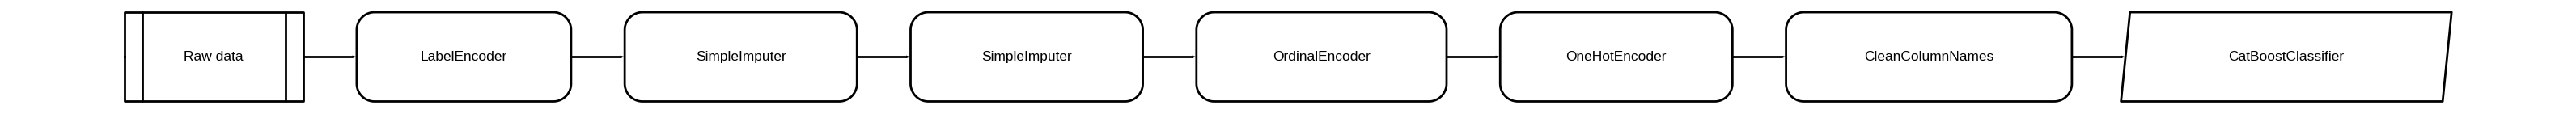

In [27]:
s.evaluate_model(best)

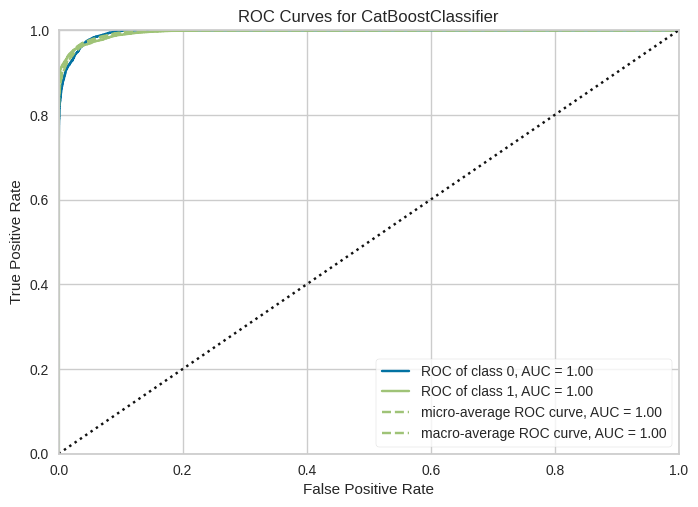

In [28]:
s.plot_model(best, plot = 'auc')

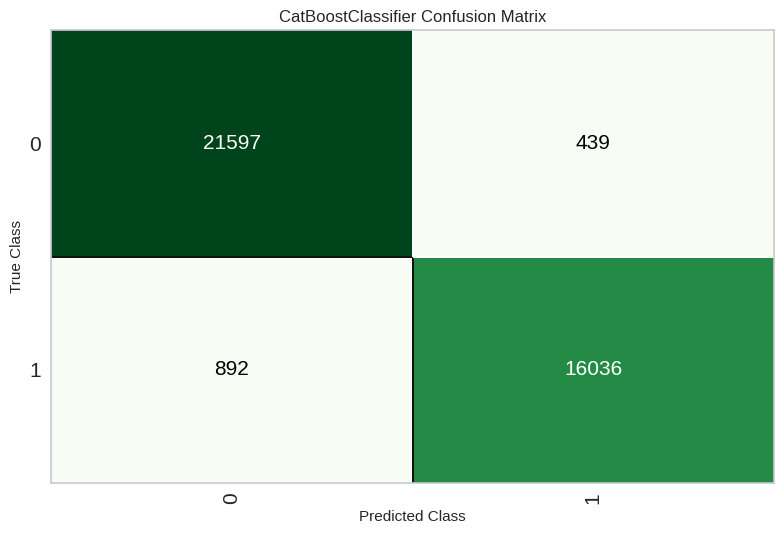

In [29]:
s.plot_model(best, plot = 'confusion_matrix')

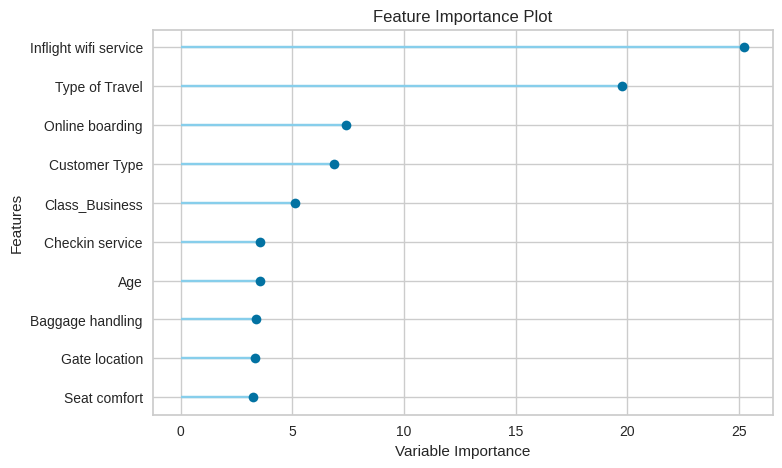

In [30]:
s.plot_model(best, plot = 'feature')

In [31]:
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9658,0.9958,0,0,0,0.9303,0.9305


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay in Minutes,Satisfaction,prediction_label,prediction_score
108600,116977,Male,disloyal Customer,24,Business travel,Business,338,0,5,0,...,5,3,5,4,4,3,68.0,satisfied,satisfied,0.9996
48591,5486,Female,Loyal Customer,8,Business travel,Business,910,4,4,4,...,2,1,4,3,4,4,19.0,neutral or dissatisfied,neutral or dissatisfied,0.7466
84518,37619,Male,Loyal Customer,51,Personal Travel,Eco,1005,4,4,4,...,3,4,1,1,1,5,0.0,neutral or dissatisfied,neutral or dissatisfied,0.6209
38314,36139,Female,Loyal Customer,26,Personal Travel,Eco,1609,1,2,2,...,1,5,4,1,3,5,1.0,neutral or dissatisfied,neutral or dissatisfied,0.9999
125100,6926,Female,Loyal Customer,45,Business travel,Business,2187,3,3,3,...,4,4,4,3,4,3,29.0,satisfied,satisfied,0.9992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122425,48275,Female,disloyal Customer,25,Business travel,Eco Plus,192,2,3,1,...,4,3,3,4,4,4,0.0,neutral or dissatisfied,neutral or dissatisfied,0.9996
120829,102859,Female,disloyal Customer,37,Business travel,Business,423,4,4,4,...,5,2,5,4,5,5,0.0,satisfied,satisfied,0.6060
53642,47274,Male,Loyal Customer,43,Business travel,Eco,588,5,2,2,...,4,2,1,5,4,5,88.0,satisfied,satisfied,0.9998
104481,55696,Male,Loyal Customer,50,Business travel,Business,2633,2,2,2,...,3,4,3,5,3,4,3.0,satisfied,satisfied,0.9999


In [32]:
predictions = s.predict_model(best, data=data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9742,0.9977,0,0,0,0.9473,0.9475


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay in Minutes,Satisfaction,prediction_label,prediction_score
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,43.0,neutral or dissatisfied,neutral or dissatisfied,1.0000
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,7.0,neutral or dissatisfied,neutral or dissatisfied,0.9999
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0.0,satisfied,satisfied,0.9999
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,20.0,neutral or dissatisfied,neutral or dissatisfied,0.9996
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0.0,satisfied,satisfied,0.9992


In [33]:
predictions = s.predict_model(best, data=data, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9742,0.9977,0,0,0,0.9473,0.9475


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay in Minutes,Satisfaction,prediction_label,prediction_score_neutral or dissatisfied,prediction_score_satisfied
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,3,4,4,5,5,43.0,neutral or dissatisfied,neutral or dissatisfied,1.0000,0.0000
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,5,3,1,4,1,7.0,neutral or dissatisfied,neutral or dissatisfied,0.9999,0.0001
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,3,4,4,4,5,0.0,satisfied,satisfied,0.0001,0.9999
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,5,3,1,4,2,20.0,neutral or dissatisfied,neutral or dissatisfied,0.9996,0.0004
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,4,4,3,3,3,0.0,satisfied,satisfied,0.0008,0.9992


In [34]:
s.save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'Age', 'Flight Distance',
                                              'Inflight wifi service',
                                              'Departure/Arrival time '
                                              'convenient',
                                              'Ease of Online booking',
                                              'Gate location', 'Food a...
                                     transformer=OneHotEncoder(cols=['Class'],
                                                               drop_invariant=False,
                                                               handle_missing=